In [1]:
!pwd
%cd content
!git clone https://github.com/gabo0802/PRIMME-Readable.git
%cd PRIMME-Readable

!pip install -r requirements.txt
import sys
sys.path.append("/content/PRIMME-Readable/PRIMME")

/content
[Errno 2] No such file or directory: 'content'
/content
Cloning into 'PRIMME-Readable'...
remote: Enumerating objects: 1107, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 1107 (delta 86), reused 62 (delta 50), pack-reused 992 (from 1)
Receiving objects: 100% (1107/1107), 115.76 MiB | 24.93 MiB/s, done.
Resolving deltas: 100% (358/358), done.
/content/PRIMME-Readable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.2/808.2 kB 34.3 MB/s eta 0:0

In [1]:
# IMPORT PACKAGES

import os.path
import torch
import matplotlib.pyplot as plt
import functions as fs
import PRIMME
from pathlib import Path

# Set PyTorch Device to CUDA or MPS if available:

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")

In [5]:
# Define test case parameters
nsteps = 800
grain_shape = "grain" # Alternatives include "circle", "hex", "square"
grain_sizes = [[512, 512], 512] # Also tested for 257x257, 1024x1024, 2048x2048, 2400x2400
ic_shape = f"{grain_shape}({grain_sizes[0][0]}_{grain_sizes[0][1]}_{grain_sizes[1]})" if grain_shape != "hex" else "hex"

# Define filename for potential saved data
filename_test = f"{ic_shape}.pickle"
path_load = Path('./data') / filename_test

# Load or generate initial conditions and misorientation data
if path_load.is_file():
    data_dict = fs.load_picke_files(load_dir=Path('./data'), filename_save=filename_test)
    ic, ea, miso_array, miso_matrix = data_dict["ic"], data_dict["ea"], data_dict["miso_array"], data_dict["miso_matrix"]
else:
    ic, ea, miso_array, miso_matrix = fs.generate_train_init(filename_test, grain_shape, grain_sizes, device)

data/grain(512_512_512).pickle start to be loaded

data/grain(512_512_512).pickle has been created



In [4]:
%cd /data
from google.colab import files
trainset = files.upload()
%cd ..

[Errno 2] No such file or directory: '/data'
/Users/gabecastejon/Developer/PRIMME_Work/PRIMME-Readable/PRIMME


/Users/gabecastejon/Developer/PRIMME_Work/PRIMME-Readable/venv/lib/python3.9/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


ModuleNotFoundError: No module named 'google'

# Define training set and model locations (only the trainset is used in this script)

In [6]:
trainset = "./data/trainset_spparks_sz(257x257)_ng(256-256)_nsets(200)_future(4)_max(100)_kt(0.66)_cut(0).h5"
# model_location = "./data/model_dim(2)_sz(17_17)_lr(5e-05)_reg(1)_ep(1000)_kt(0.66)_cut(0).h5"
# fp_primme = "./data/primme_shape(grain(512_512_512))_model_dim(2)_sz(17_17)_lr(5e-05)_reg(1)_ep(1000)_kt(0.66)_cut(0).h5"

### Train PRIMME using the above training set from SPPARKS

In [7]:
print(os.path.exists("./data/trainset_spparks_sz(257x257)_ng(256-256)_nsets(200)_future(4)_max(100)_kt(0.66)_cut(0).h5"))
trainset = "./data/trainset_spparks_sz(257x257)_ng(256-256)_nsets(200)_future(4)_max(100)_kt(0.66)_cut(0).h5"
model_location = PRIMME.train_primme(trainset, n_step=nsteps, n_samples=200, mode="Single_Step", num_eps=5, dims=2, obs_dim=17, act_dim=17, lr=5e-5, reg=1, pad_mode="circular", if_plot=False)

True
Training PRIMME using device: mps
<KeysViewHDF5 ['euler_angles', 'ims_energy', 'ims_id', 'miso_array', 'num_features_17', 'num_features_25', 'num_features_35', 'num_features_49']>


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]/Users/gabecastejon/Developer/PRIMME_Work/PRIMME-Readable/PRIMME/functions.py:1413: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3729.)
  features = my_unfoldNd(local_energy.float(), obs_dim, pad_mode=pad_mode).T.reshape((np.prod(size),)+(obs_dim,)*(len(size)-1))
Epochs: 100%|██████████| 5/5 [33:18<00:00, 399.67s/it]


# Run PRIMME model

In [8]:
ims_id, fp_primme = PRIMME.run_primme(ic, ea, miso_array, miso_matrix, nsteps=nsteps, ic_shape=ic_shape, modelname=model_location, pad_mode='circular', if_plot=False)


Running PRIMME simulation: 100%|██████████| 800/800 [14:23<00:00,  1.08s/it]


# Generate plots

<KeysViewHDF5 ['sim0']>
<KeysViewHDF5 ['euler_angles', 'ims_id', 'miso_array', 'miso_matrix']>
Calculating statistics for: ./data/primme_sz(512x512)_ng(512)_nsteps(800)_freq(1)_kt(0.66)_cut(0).h5/sim0


In progress: find_grain_areas: 100%|██████████| 801/801 [00:01<00:00, 525.92it/s]


Calculated: grain_areas


In progress: mean_wo_zeros: 100%|██████████| 801/801 [00:00<00:00, 61544.22it/s]


Calculated: grain_areas_avg


In progress: find_grain_num_neighbors: 100%|██████████| 801/801 [17:04<00:00,  1.28s/it]


Calculated: grain_sides


In progress: mean_wo_zeros: 100%|██████████| 801/801 [00:00<00:00, 72331.16it/s]


Calculated: grain_sides_avg


Making videos:   0%|          | 0/1 [00:00<?, ?it/s]Python(62236) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(62237) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(62238) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(62239) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Making videos: 100%|██████████| 1/1 [00:16<00:00, 16.19s/it]


<KeysViewHDF5 ['sim0']>
Last groups in each h5 file chosen:


Calculating avg grain areas: 100%|██████████| 1/1 [00:00<00:00, 39.61it/s]


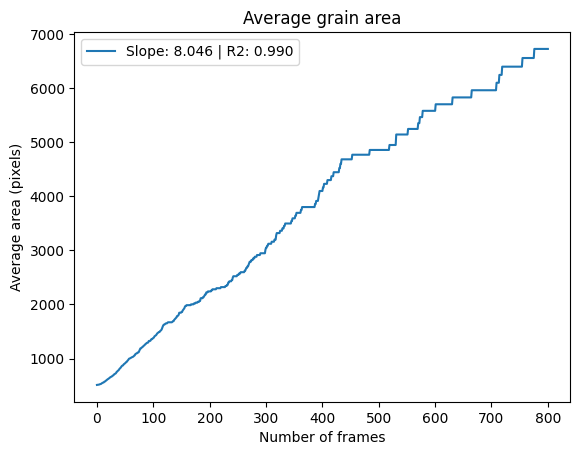

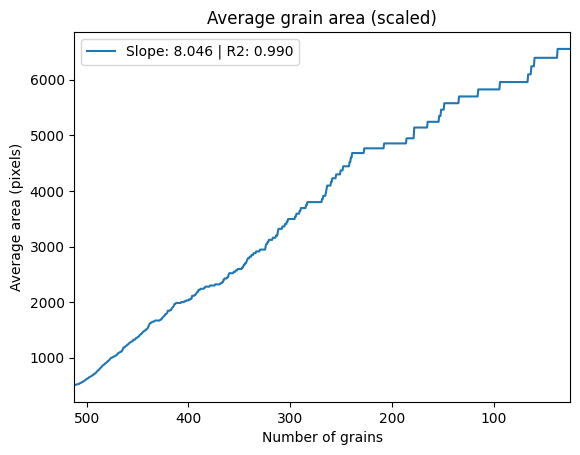

Plotting avg grain sides: 100%|██████████| 1/1 [00:00<00:00, 1681.08it/s]


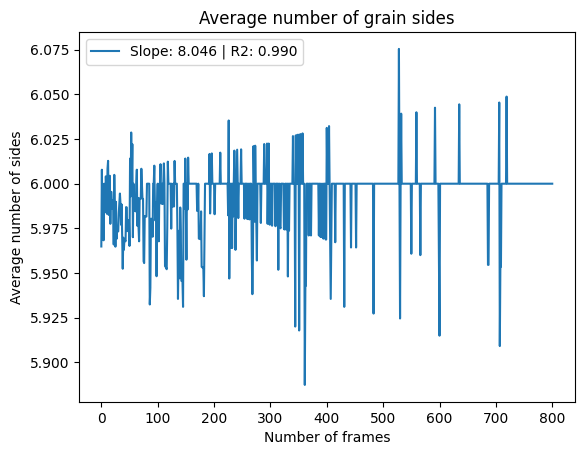

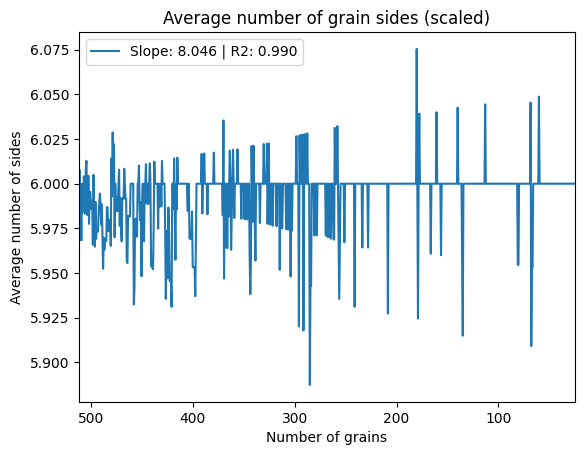

Calculating normalized radius distribution: 100%|██████████| 1/1 [00:00<00:00, 144.07it/s]


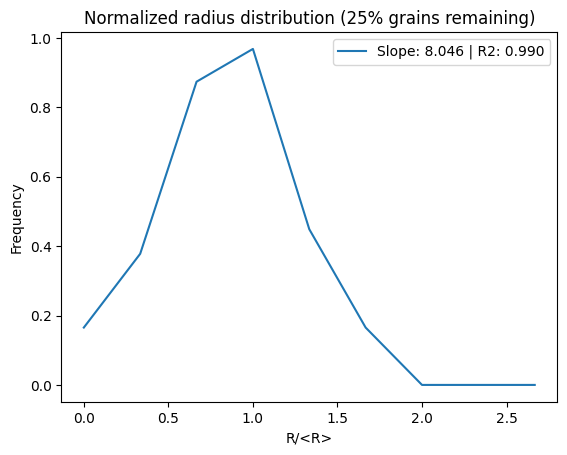

Calculating number of sides distribution: 100%|██████████| 1/1 [00:00<00:00, 131.73it/s]


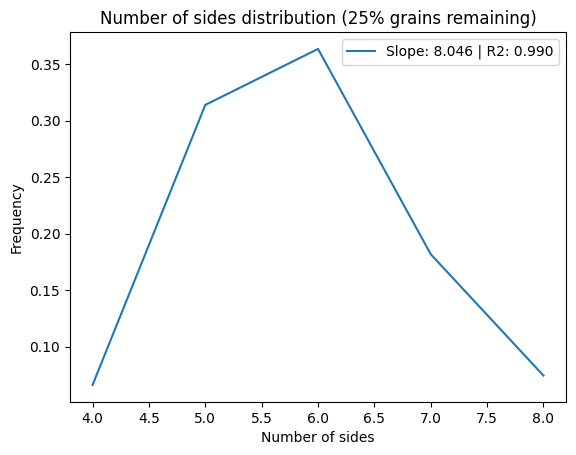

In [9]:
fs.compute_grain_stats(fp_primme)
fs.make_videos(fp_primme, ic_shape=ic_shape) #saves to 'plots'
fs.make_time_plots(fp_primme, ic_shape=ic_shape) #saves to 'plots'

In [10]:
from IPython.display import Video

# Display the video
video_path = 'plots/grain(512_512_512)_ims_id0.mp4'
Video(video_path, embed=True)